In [4]:
import geopandas as gpd

africa_rivers = gpd.read_file('./data/HydroRIVERS_v10_af_shp/HydroRIVERS_v10_af_shp/HydroRIVERS_v10_af.shp')

africa_rivers.head()

,HYRIV_ID,NEXT_DOWN,MAIN_RIV,LENGTH_KM,DIST_DN_KM,DIST_UP_KM,CATCH_SKM,UPLAND_SKM,ENDORHEIC,DIS_AV_CMS,ORD_STRA,ORD_CLAS,ORD_FLOW,HYBAS_L12,geometry
0,10000001,0,10000001,0.89,0.0,7.2,11.27,11.1,0,0.062,1,1,8,1120031210,"LINESTRING (9.6625 37.325, 9.65625 37.33125)"
1,10000002,0,10000002,2.90,0.0,7.0,24.59,24.2,0,0.126,1,1,7,1120031210,"LINESTRING (9.8 37.30833, 9.81042 37.31875, 9...."
2,10000003,10000009,10000009,4.63,5.7,9.8,57.23,57.2,0,0.316,1,1,7,1120031210,"LINESTRING (9.68542 37.27083, 9.68542 37.26458..."
3,10000004,10000009,10000009,0.69,5.7,5.4,11.11,11.1,0,0.061,1,2,8,1120031210,"LINESTRING (9.71458 37.2375, 9.71458 37.24375)"
4,10000005,0,10000005,8.32,0.0,13.6,35.02,34.0,0,0.177,1,1,7,1120031210,"LINESTRING (9.75 37.27708, 9.75625 37.27708, 9..."


In [ ]:
country_shapefiles = gpd.read_file('../map2_lines/natural_earth/ne_10m_admin_0_countries.shp')

africa = country_shapefiles.loc[country_shapefiles['CONTINENT'] == 'Africa']

In [15]:
# Add in lakes from natural earth and combine with the river vectors

lakes = gpd.read_file("C:/Users/brett/OneDrive/Documents/ArcGIS/Data/Natural Earth/ne_10m_lakes/ne_10m_lakes.shp")
lakes = lakes.loc[lakes['featurecla'] == 'Lake']
lakes = lakes.dropna(subset=['name'])

africa_lakes = gpd.sjoin(lakes, africa, predicate='intersects')
africa_lakes = lakes.loc[lakes.index.isin(africa_lakes.index.tolist())]

# Exclude river vector lines within african lakes
excluded_rivers = gpd.sjoin(africa_rivers, africa_lakes, predicate='within')
africa_rivers = africa_rivers.loc[~africa_rivers.index.isin(excluded_rivers.index.tolist())]

# Also exclude rivers that are dry most of the year
africa_rivers = africa_rivers.loc[africa_rivers['ORD_FLOW'] < 8]

<Axes: >

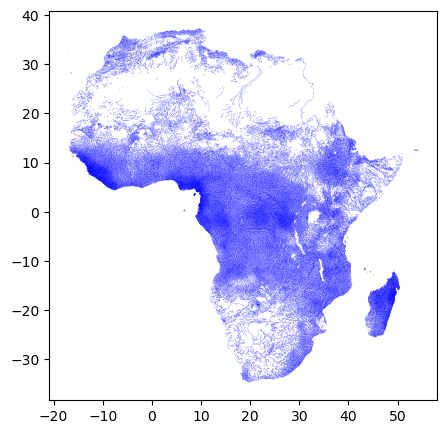

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(5, 7)

africa_rivers.plot(ax=ax, color='blue', lw=0.1)

In [17]:
# Scale linewidths based on upstream distances

import numpy as np

leftSpan = np.amax(africa_rivers['DIST_UP_KM']) - np.amin(africa_rivers['DIST_UP_KM'])
rightSpan = 0.6 - 0.004
valueScaled = (africa_rivers['DIST_UP_KM'] - np.amin(africa_rivers['DIST_UP_KM'])) / leftSpan
africa_rivers['LW_DIST_UP_KM'] = 0.004 + (valueScaled * rightSpan)

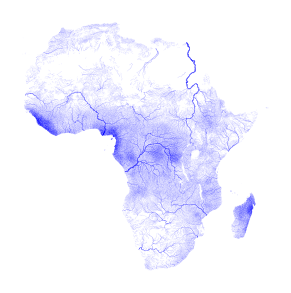

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(3.5, 7)

africa_rivers.plot(ax=ax, edgecolor='face', color='blue', lw=africa_rivers['LW_DIST_UP_KM'])
africa_lakes.plot(ax=ax, color='white')

ax.axis('off')
plt.show()

In [66]:
basins = gpd.read_file('data\hybas_af_lev01-06_v1c\hybas_af_lev03_v1c.shp')

basins

<>:1: SyntaxWarning: invalid escape sequence '\h'
<>:1: SyntaxWarning: invalid escape sequence '\h'
C:\Users\brett\AppData\Local\Temp\ipykernel_20868\3520345900.py:1: SyntaxWarning: invalid escape sequence '\h'
  basins = gpd.read_file('data\hybas_af_lev01-06_v1c\hybas_af_lev03_v1c.shp')


,HYBAS_ID,NEXT_DOWN,NEXT_SINK,MAIN_BAS,DIST_SINK,DIST_MAIN,SUB_AREA,UP_AREA,PFAF_ID,ENDO,COAST,ORDER,SORT,geometry
0,1030000010,0,1030000010,1030000010,0.0,0.0,236343.2,236343.2,111,0,1,0,1,"MULTIPOLYGON (((39.76528 15.42917, 39.75492 15..."
1,1030003990,0,1030003990,1030003990,0.0,0.0,519027.5,519027.5,112,0,1,0,2,"MULTIPOLYGON (((40.81528 14.75417, 40.79561 14..."
2,1030008100,0,1030008100,1030008100,0.0,0.0,797881.4,797881.4,114,0,0,1,3,"POLYGON ((36.74167 4.06667, 36.74131 4.06909, ..."
3,1030008110,0,1030008110,1030008110,0.0,0.0,1040194.7,1040194.7,117,0,1,0,4,"MULTIPOLYGON (((40.84444 -2.43333, 40.83833 -2..."
4,1030011530,0,1030011530,1030011530,0.0,0.0,4421.4,4421.4,121,0,1,0,5,"POLYGON ((36.42083 -18.56667, 36.42083 -18.570..."
5,1030011660,0,1030011660,1030011660,0.0,0.0,1378103.3,1378121.1,122,0,0,1,6,"POLYGON ((35.2625 -18.23333, 35.26215 -18.2440..."
6,1030011670,0,1030011670,1030011670,0.0,0.0,245186.1,245186.1,123,0,1,0,7,"MULTIPOLYGON (((35.44861 -23.825, 35.44252 -23..."
7,1030012590,0,1030012590,1030012590,0.0,0.0,412581.2,412581.2,124,0,0,1,8,"POLYGON ((29.87083 -25.8125, 29.86998 -25.8158..."
8,1030012600,0,1030012600,1030012600,0.0,0.0,403562.0,403562.0,125,0,1,0,9,"MULTIPOLYGON (((26.29028 -33.84583, 26.28531 -..."
9,1030015030,0,1030015030,1030015030,0.0,0.0,111328.1,111328.1,126,0,1,0,10,"MULTIPOLYGON (((19.41944 -34.69167, 19.40928 -..."


In [67]:
print(len(np.unique(basins['MAIN_BAS'])))

49


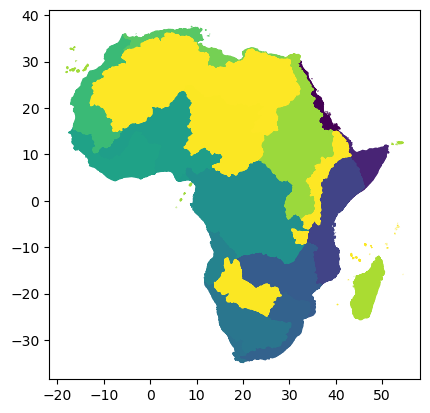

In [68]:
fig, ax = plt.subplots()

basins.plot(ax=ax, column='MAIN_BAS', edgecolor='face')

plt.show()

In [73]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

colors_list = [
    '#FF5733', '#33FF57', '#3357FF', '#FF33A1', '#A133FF', '#33FFA1', '#FFA133',
    '#FF3371', '#7133FF', '#33FF71', '#7171FF', '#A1FF33', '#33A1FF', '#33FFA1',
    '#FF7171', '#71FF33', '#A171FF', '#3371FF', '#FF33A1', '#33A171', '#A1A1FF',
    '#FF57A1', '#A157FF', '#33A157', '#57A1FF', '#FF33C1', '#C133FF', '#33C1A1',
    '#FFC133', '#C1FF33', '#A1C1FF', '#FF33B1', '#B1FF33', '#33FFB1', '#B1A1FF',
    '#FF33D1', '#D1FF33', '#33FFD1', '#D1A1FF', '#FF3371', '#7133A1', '#A1FF71',
    '#3371D1', '#FFD133', '#D1FF71', '#A1D1FF', '#FF33E1', '#E1FF33', '#33FFE1'
]

colors_df = pd.DataFrame({'basin': basins.MAIN_BAS.unique().tolist(), 'colors': colors_list})

C:\Users\brett\AppData\Local\Temp\ipykernel_20868\983032411.py:4: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  basins.plot(ax=ax, column="MAIN_BAS", edgecolor='face', color=basins['colors'])


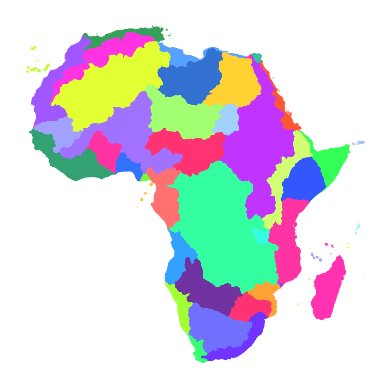

In [74]:
basins = pd.merge(basins, colors_df, left_on='MAIN_BAS', right_on='basin', how='left')

fig, ax = plt.subplots()
basins.plot(ax=ax, column="MAIN_BAS", edgecolor='face', color=basins['colors'])

ax.axis('off')
plt.show()


In [76]:
rivers_basins = gpd.sjoin(africa_rivers, basins, predicate='within')

In [77]:
rivers_basins

,HYRIV_ID,NEXT_DOWN_left,MAIN_RIV,LENGTH_KM,DIST_DN_KM,DIST_UP_KM,CATCH_SKM,UPLAND_SKM,ENDORHEIC,DIS_AV_CMS,...,SUB_AREA,UP_AREA,PFAF_ID,ENDO,COAST,ORDER,SORT,basin_x,basin_y,colors
1,10000002,0,10000002,2.90,0.0,7.0,24.59,24.2,0,0.126,...,275925.8,275925.8,153,0,1,0,24,1030029810,1030029810,#33A157
2,10000003,10000009,10000009,4.63,5.7,9.8,57.23,57.2,0,0.316,...,275925.8,275925.8,153,0,1,0,24,1030029810,1030029810,#33A157
4,10000005,0,10000005,8.32,0.0,13.6,35.02,34.0,0,0.177,...,275925.8,275925.8,153,0,1,0,24,1030029810,1030029810,#33A157
6,10000007,0,10000007,3.66,0.0,17.4,8.54,96.8,0,0.811,...,275925.8,275925.8,153,0,1,0,24,1030029810,1030029810,#33A157
8,10000009,0,10000009,5.54,0.0,15.3,25.47,89.7,0,0.480,...,275925.8,275925.8,153,0,1,0,24,1030029810,1030029810,#33A157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1527533,11527534,11527539,11527539,6.37,2.7,67.6,26.48,1047.2,0,0.152,...,111328.1,111328.1,126,0,1,0,10,1030015030,1030015030,#33FF71
1527534,11527535,11527539,11527539,6.33,2.9,79.4,19.59,726.6,0,1.562,...,111328.1,111328.1,126,0,1,0,10,1030015030,1030015030,#33FF71
1527538,11527539,0,11527539,2.50,0.0,82.1,5.29,1778.4,0,1.642,...,111328.1,111328.1,126,0,1,0,10,1030015030,1030015030,#33FF71
1527544,11527545,11527547,11527547,7.36,3.3,17.8,22.59,87.9,0,0.200,...,111328.1,111328.1,126,0,1,0,10,1030015030,1030015030,#33FF71


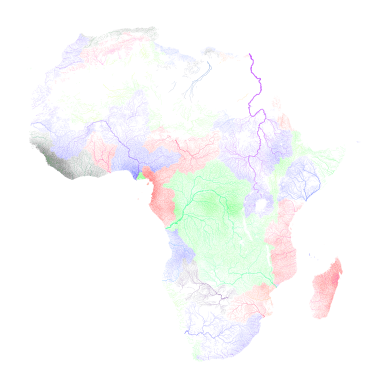

In [78]:
fig, ax = plt.subplots()

rivers_basins.plot(ax=ax, edgecolor='face', color=rivers_basins['colors'], lw=rivers_basins['LW_DIST_UP_KM'])
ax.axis('off')
plt.show()

In [79]:
fig.savefig('africarivers.png', dpi = 200)

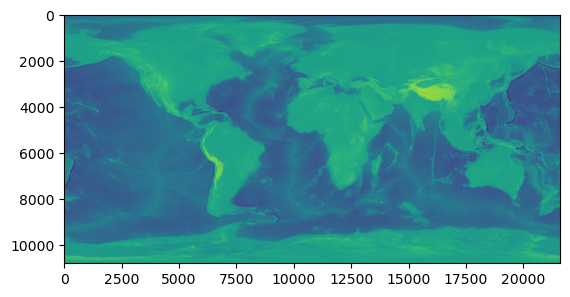

In [82]:
# Adding topography

import rasterio

img = rasterio.open("C:/Users/brett/OneDrive/Documents/ArcGIS/Data/NOAA_ETOPO1 _Global_Relief_Model/ETOPO1_Bed_g_geotiff.tif")
image = img.read()

from rasterio.plot import show

show(image)
plt.show()

In [87]:
from shapely.geometry import mapping
from rasterio import mask as msk

a_array, clipped_transform = msk.mask(img, [mapping(geom) for geom in africa.geometry.tolist()], crop=True)

a_array, clipped_transform = msk.mask(img, [mapping(geom) for geom in africa.geometry.tolist()], crop=True, nodata=(np.amin(a_array[0] - 1)))

value_range = np.amax(a_array) + abs(np.amin(a_array))

In [93]:
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib import cm

colors = plt.cm.terrain(np.linspace(0.25, 1, 6279))
background_colour = np.array([1.0, 1.0, 1.0, 1.0])
colors[:1, :] = background_colour
our_cmap = ListedColormap(colors)

bounds = np.arange(np.amin(a_array), np.amax(a_array)-2500, 10)
norm = BoundaryNorm(bounds, our_cmap.N)

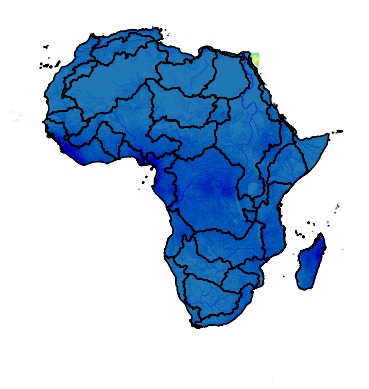

In [95]:
fig, ax = plt.subplots()

show(a_array, ax=ax, transform=clipped_transform, cmap=our_cmap, norm=norm)
basins.plot(ax=ax, edgecolor='black', lw=1)
rivers_basins.plot(ax=ax, edgecolor='face', color='blue', lw=rivers_basins['LW_DIST_UP_KM'])
ax.axis('off')
plt.show()



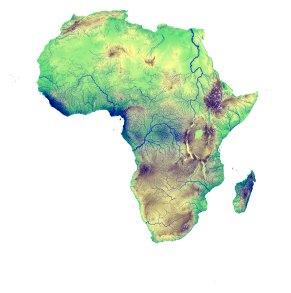

In [97]:
fig, ax = plt.subplots()
fig.set_size_inches(3.5, 7)

show(a_array, ax=ax, transform=clipped_transform, cmap=our_cmap, norm=norm)
rivers_basins.plot(ax=ax, edgecolor='face', color='blue',lw=rivers_basins['LW_DIST_UP_KM'])

ax.axis('off')
plt.show()